In [12]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("dark")

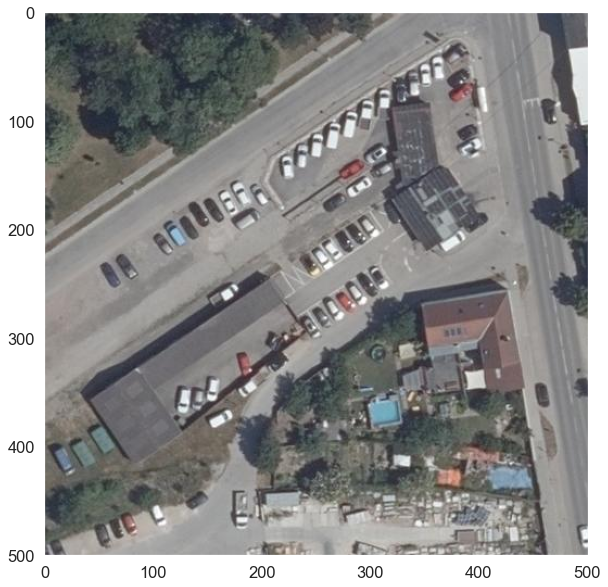

In [2]:

filename ="tilesForFilterTesting/tifclip5.tif"
image = Image.open(filename)
image_to_np_array = np.array(image)

fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(image)

In [3]:

# Split the three channels
r,g,b = np.split(image_to_np_array,3,axis=2)
#Coverting into 1-D arrays
r=r.reshape(-1)
g=g.reshape(-1)
b=b.reshape(-1)



Extract whiteLines

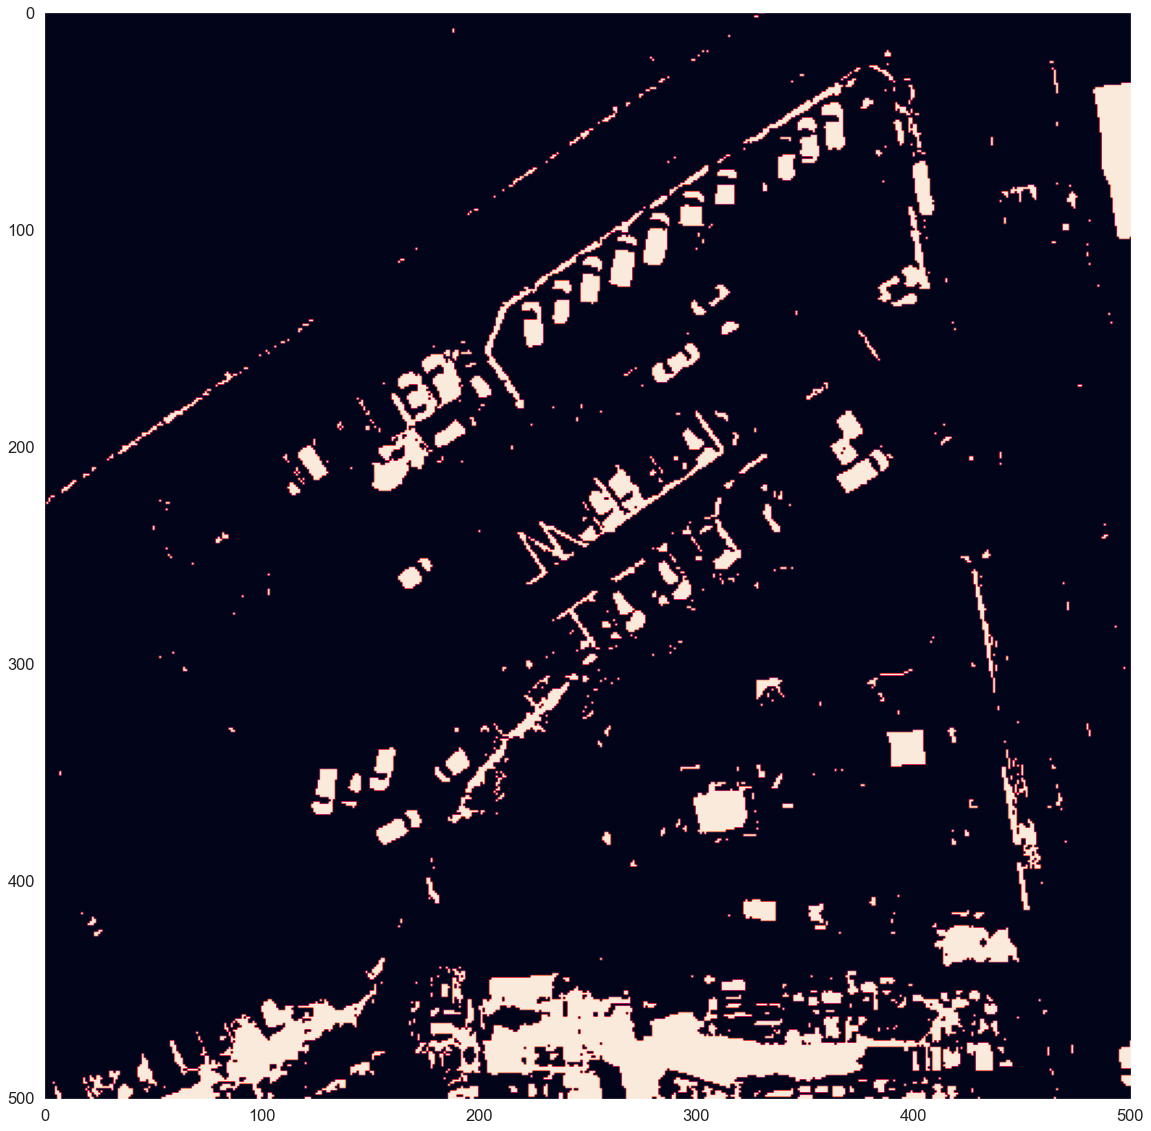

In [4]:
# Standard RGB to grayscale 
bitmap = list(map(lambda x:x[2], zip(r,g,b)))
bitmap = np.array(bitmap).reshape([image_to_np_array.shape[0], image_to_np_array.shape[1]])
bitmap = np.dot((bitmap > 165).astype(float),255)
im = Image.fromarray(bitmap.astype(np.uint8))
fig, ax = plt.subplots(figsize =(20,20))
ax.imshow(im)
im.save('imagesProcessedByFilters/ExtractWhiteLines.tif')

Read image pixel by pixel, manual filters

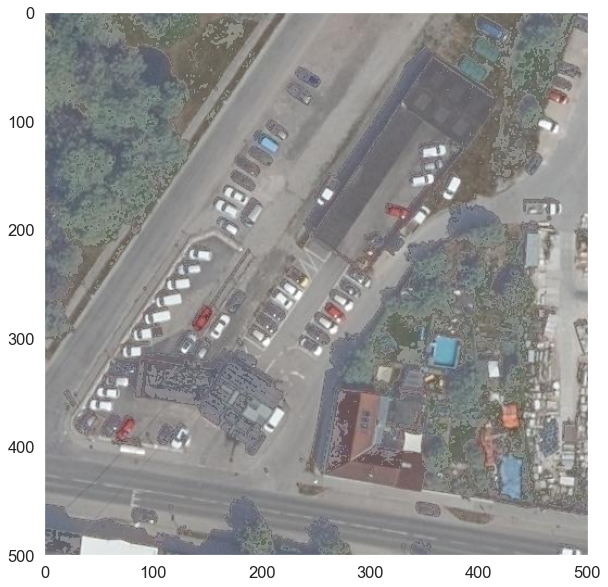

In [13]:
img = Image.open(filename) # Create a new black image
image_to_np_array = np.array(image)
r,g,b = np.split(image_to_np_array,3,axis=2)
#Coverting into 1-D arrays
r=r.reshape(-1)
g=g.reshape(-1)
b=b.reshape(-1)
c =0
pixels = img.load() # Create the pixel map
brightness=+50
black_umbral = 100
for i in range(img.size[1]):    # For every pixel:
    for j in range(img.size[0]):
        #gray_filter =(r[c]+ g[c]+ b[c])//3
        #pixels[i,j] = (gray_filter,gray_filter,gray_filter)
        #pixels[i,j] = (r[c]+brightness, g[c]+brightness, b[c]+brightness)
        if(r[c]<black_umbral and g[c]<black_umbral and b[c]<black_umbral):
            #print(pixels[i,j])
            pixels[i,j] = (r[c]+brightness, g[c]+brightness, b[c]+brightness) # Set the colour accordingly
        else:
            pixels[i,j] = (r[c], g[c], b[c]) # Set the colour accordingly

        c=c+1
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)
img.save("imagesProcessedByFilters/AddContrast.tif")

Delete shadows

In [6]:
import cv2
import numpy as np

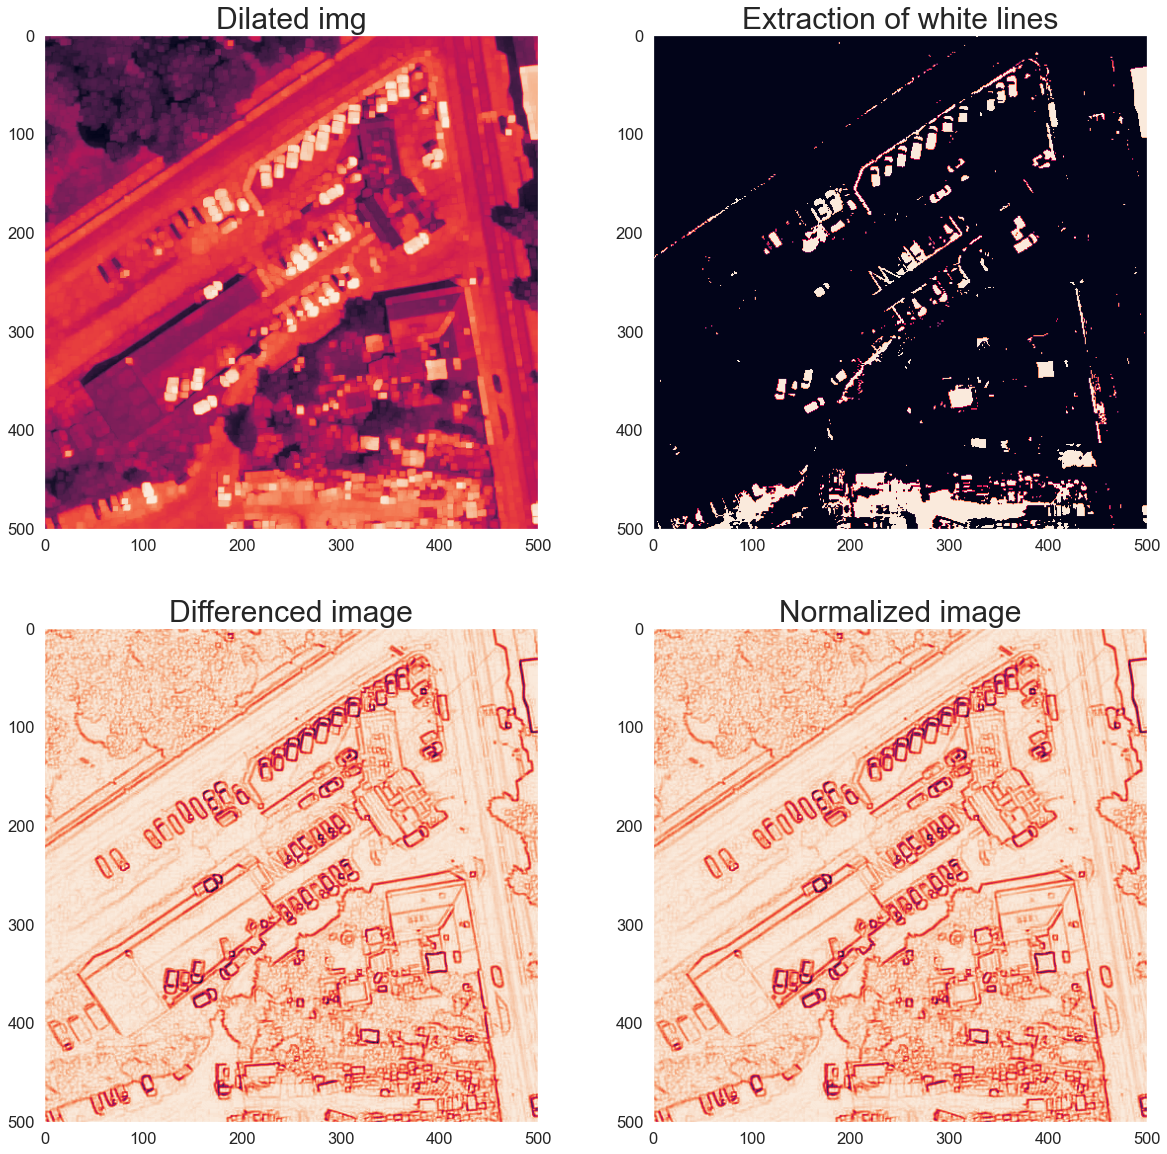

In [10]:
img = cv2.imread(filename, -1)

#Extrae los tres canales r,g,b dentro de una tupla de matrices
rgb_planes = cv2.split(img)
flag = True
result_planes = []
result_norm_planes = []

for plane in rgb_planes:
    
    dilated_img = cv2.dilate(plane, np.ones((5,5), np.uint8))
    #bg_img = cv2.medianBlur(dilated_img, 1)
    diff_img = 255 - cv2.absdiff(plane, dilated_img)

    norm_img = cv2.normalize(diff_img,None, alpha=1, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)        

    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)


result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)
plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.title('Dilated img',fontsize = 30)
plt.imshow(dilated_img)
plt.subplot(222)
plt.title('Extraction of white lines',fontsize = 30)
plt.imshow(im)
plt.subplot(223)
plt.title('Differenced image',fontsize = 30)
plt.imshow(diff_img)
plt.subplot(224)
plt.title('Normalized image',fontsize = 30)
plt.imshow(norm_img)
#cv2.imwrite('imagesProcessedByFilters/extractShadows.tif', result)
#cv2.imwrite('imagesProcessedByFilters/NormaliyedImage.tif', result_norm)